## **Universidad Galileo**
## **Maestría en Data Science**
## **Statistical Learning II**
## **Antonio Everardo Navas Contreras, 14003163**
## **24/09/2021**

---

## **PROYECTO FINAL - MLP**

---

### CARGAR LIBRERIAS

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import sklearn as sk
import seaborn as sns
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.callbacks import ModelCheckpoint

In [30]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### CARGAR, PREPARAR Y EXPLORAR EL DATASET

In [31]:
dataset = pd.read_csv('/content/drive/MyDrive/MLP/adult.csv')

In [32]:
print("Shape dataset original:", dataset.shape)

Shape dataset original: (48842, 15)


In [33]:
# Información sobre las variables del dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [34]:
dataset.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [35]:
dataset.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [36]:
# Reemplazar los simbolos '?' por la moda de esa variable

dataset['workclass'].replace('?', dataset["workclass"].mode()[0], inplace=True)
dataset['occupation'].replace('?', dataset["occupation"].mode()[0], inplace=True)
dataset['native-country'].replace('?', dataset["native-country"].mode()[0], inplace=True)

In [37]:
dataset['capital-gain'] = dataset['capital-gain'].replace(0,dataset['capital-gain'].mean())
dataset['capital-loss'] = dataset['capital-loss'].replace(0,dataset['capital-loss'].mean())

In [38]:
dataset.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [39]:
# Revisar valores unicos en cada variable

for i in dataset.columns:
  print(i, ':\n', np.unique(dataset[i]), '\n')

age :
 [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 90] 

workclass :
 ['Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay'] 

fnlwgt :
 [  12285   13492   13769 ... 1455435 1484705 1490400] 

education :
 ['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college'] 

educational-num :
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] 

marital-status :
 ['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed'] 

occupation :
 ['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Pr

In [40]:
# Codificación de las variables tipo object

label_encoder = LabelEncoder()

for i in dataset.columns:
  if dataset[i].dtypes == 'object':
    dataset[i] = label_encoder.fit_transform(dataset[i])

In [41]:
# Información sobre las variables del dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              48842 non-null  int64  
 1   workclass        48842 non-null  int64  
 2   fnlwgt           48842 non-null  int64  
 3   education        48842 non-null  int64  
 4   educational-num  48842 non-null  int64  
 5   marital-status   48842 non-null  int64  
 6   occupation       48842 non-null  int64  
 7   relationship     48842 non-null  int64  
 8   race             48842 non-null  int64  
 9   gender           48842 non-null  int64  
 10  capital-gain     48842 non-null  float64
 11  capital-loss     48842 non-null  float64
 12  hours-per-week   48842 non-null  int64  
 13  native-country   48842 non-null  int64  
 14  income           48842 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 5.6 MB


In [42]:
dataset.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,1079.067626,87.502314,40,38,0
1,38,3,89814,11,9,2,4,0,4,1,1079.067626,87.502314,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,1079.067626,87.502314,40,38,1
3,44,3,160323,15,10,2,6,0,2,1,7688.000000,87.502314,40,38,1
4,18,3,103497,15,10,4,9,3,4,0,1079.067626,87.502314,30,38,0


In [43]:
# Revisar valores unicos en cada variable

for i in dataset.columns:
  print(i, ':\n', np.unique(dataset[i]), '\n')

age :
 [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 90] 

workclass :
 [0 1 2 3 4 5 6 7] 

fnlwgt :
 [  12285   13492   13769 ... 1455435 1484705 1490400] 

education :
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 

educational-num :
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] 

marital-status :
 [0 1 2 3 4 5 6] 

occupation :
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] 

relationship :
 [0 1 2 3 4 5] 

race :
 [0 1 2 3 4] 

gender :
 [0 1] 

capital-gain :
 [  114.           401.           594.           914.
   991.          1055.          1079.06762622  1086.
  1111.          1151.          1173.          1264.
  1409.          1424.          1455.          1471.
  1506.          1639.          1731.          1797.
  1831.          1848.          2009.          2036.
  2050.          2062.     

In [44]:
# Matriz de Correlación entre todas las variables

corr_matrix = round(dataset.corr(), 2)

corr_matrix

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.00,0.05,-0.08,-0.02,0.03,-0.26,-0.00,-0.26,0.03,0.09,0.07,0.06,0.07,-0.00,0.23
workclass,0.05,1.00,-0.03,0.01,0.01,-0.02,0.01,-0.06,0.05,0.07,0.03,0.00,0.04,-0.00,-0.00
fnlwgt,-0.08,-0.03,1.00,-0.02,-0.04,0.03,-0.00,0.01,-0.03,0.03,-0.00,-0.00,-0.01,-0.06,-0.01
education,-0.02,0.01,-0.02,1.00,0.36,-0.04,-0.04,-0.01,0.01,-0.03,0.03,0.02,0.06,0.08,0.08
educational-num,0.03,0.01,-0.04,0.36,1.00,-0.07,0.07,-0.09,0.03,0.01,0.12,0.08,0.14,0.09,0.33
marital-status,-0.26,-0.02,0.03,-0.04,-0.07,1.00,0.03,0.19,-0.07,-0.13,-0.04,-0.03,-0.19,-0.02,-0.20
occupation,-0.00,0.01,-0.00,-0.04,0.07,0.03,1.00,-0.03,-0.01,0.04,0.01,0.01,-0.02,-0.00,0.03
relationship,-0.26,-0.06,0.01,-0.01,-0.09,0.19,-0.03,1.00,-0.12,-0.58,-0.05,-0.06,-0.25,-0.01,-0.25
race,0.03,0.05,-0.03,0.01,0.03,-0.07,-0.01,-0.12,1.00,0.09,0.01,0.02,0.04,0.12,0.07
gender,0.09,0.07,0.03,-0.03,0.01,-0.13,0.04,-0.58,0.09,1.00,0.05,0.05,0.23,-0.00,0.21


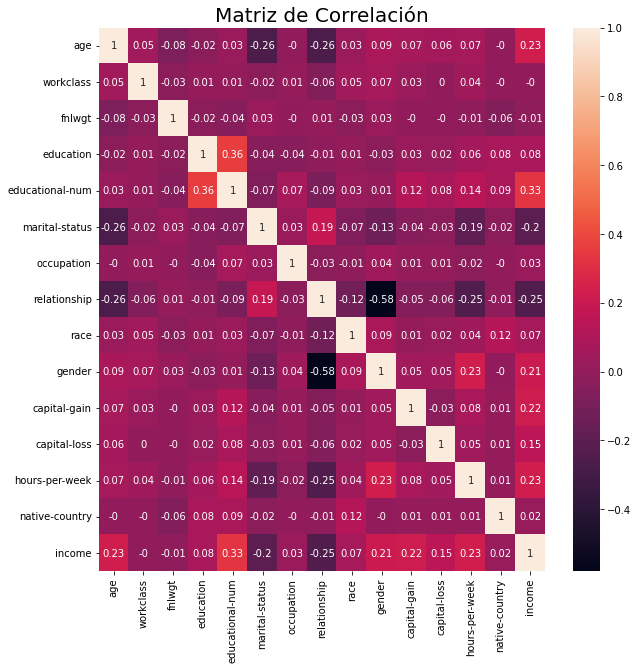

In [45]:
# Visualización de Matriz de Correlación entre todas las variables

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)
plt.title("Matriz de Correlación", fontdict={"fontsize":20, "color":"black"})
plt.show()

In [46]:
# Coeficientes de correlación con la variable de interés 'income'

corr_matrix['income'].sort_values(ascending=False)

income             1.00
educational-num    0.33
hours-per-week     0.23
age                0.23
capital-gain       0.22
gender             0.21
capital-loss       0.15
education          0.08
race               0.07
occupation         0.03
native-country     0.02
workclass         -0.00
fnlwgt            -0.01
marital-status    -0.20
relationship      -0.25
Name: income, dtype: float64

In [47]:
# Eliminar las que tengan menos de 10% de correlación

dataset.drop(['education', 'race', 'occupation', 'native-country', 'workclass', 'fnlwgt'], axis=1, inplace=True)
print("Shape dataset:", dataset.shape)

Shape dataset: (48842, 9)


In [48]:
x = dataset.drop(['income'],axis=1)
y = dataset[['income']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.20, shuffle=True,)

print("X Train shape:", x_train.shape)
print("Y Train shape:", y_train.shape)
print('---------------------------')
print("X Test shape: ", x_test.shape)
print("Y Test shape: ", y_test.shape)

X Train shape: (39073, 8)
Y Train shape: (39073, 1)
---------------------------
X Test shape:  (9769, 8)
Y Test shape:  (9769, 1)


In [49]:
# Normalizar la data

scaler = StandardScaler()
#scaler = MinMaxScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns = x_test.columns)

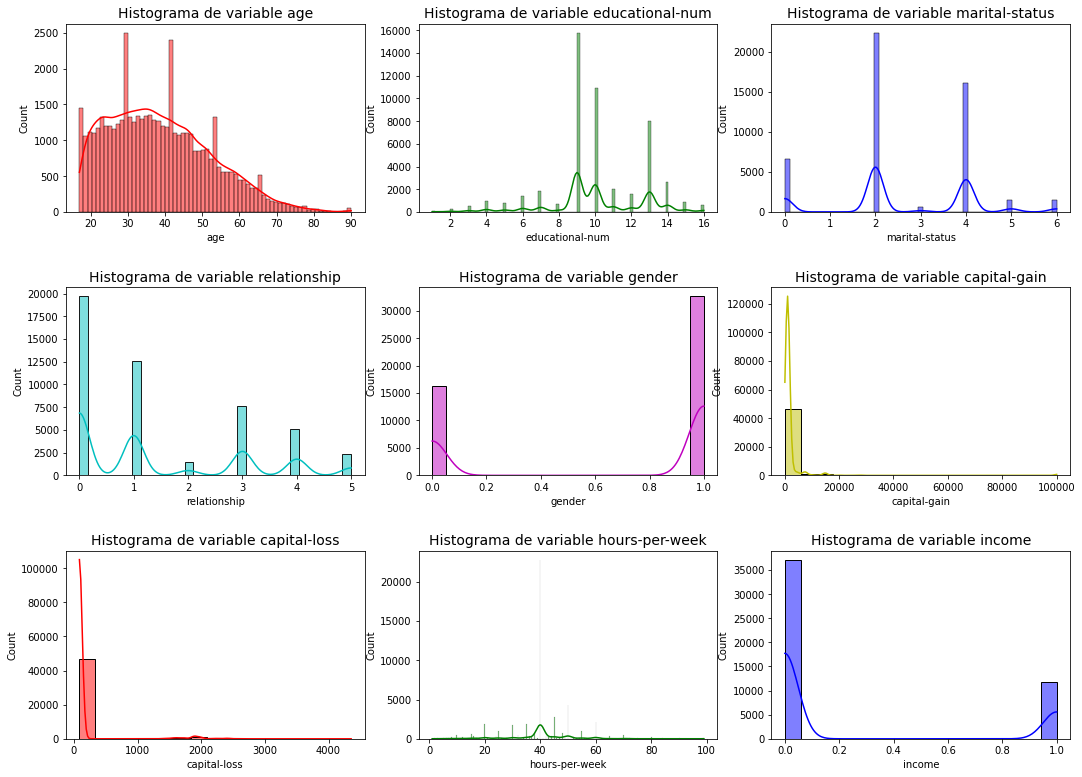

In [50]:
# Histograma de cada variable

plt.figure(figsize=(18, 18))
plt.subplots_adjust(hspace=0.4, wspace=0.18)

colors = ["r", "g", "b", "c", "m", "y", "r", "g", "b", "c"]#, "m", "y"]

for i in range(len(dataset.columns)):
  plt.subplot(4, 3, i+1)
  sns.histplot(dataset.iloc[:,i], kde=True, color=colors[i])
  plt.title("Histograma de variable {}".format(dataset.columns[i]), fontdict={"fontsize":14, "color":"black"})

plt.show()

In [51]:
# Inicialización de la tabla de scores antes de la experimentación

scores_table = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
scores_table

,Model,Accuracy,Precision,Recall,F1


### CREAR RED Y EXPERIMENTAR

In [52]:
# Chekpoint para guardar los parámetros del mejor Accuracy alcanzado con datos de validación

checkpoint = ModelCheckpoint(filepath="/content/drive/MyDrive/MLP/Models/MLP_best_weights.hdf5",
                              monitor = 'val_accuracy',
                              verbose=1,
                              save_best_only=True,)

In [53]:
# Red MLP

try:
  model.load_weights('/content/drive/MyDrive/MLP/Models/MLP_best_weights.hdf5')
except:
  model = Sequential([
                      Dense(units=256, activation='relu', kernel_initializer='uniform'),
                      Dropout(0.50),
                      Dense(units=128, activation='relu', kernel_initializer='uniform'),
                      Dropout(0.50),
                      Dense(units=32, activation='relu', kernel_initializer='uniform'),
                      Dropout(0.50),
                      Dense(units=1, activation='sigmoid')
  ])

In [54]:
# Entrenar el modelo

loss = 'BinaryCrossentropy'
optimizer = 'Nadam'
lr = 0.001
metrics = ['accuracy', 'AUC']

validation_split = 0.20
batch_size = 2048
epochs = 300

model.compile(loss=loss,
              optimizer=eval('keras.optimizers.'+str(optimizer)+'(learning_rate='+str(lr)+')'),
              metrics=metrics)

history = model.fit(
    x_train,
    y_train,
    validation_split = validation_split,
    batch_size = batch_size,
    epochs = epochs,
    callbacks = [checkpoint]
)

Epoch 1/300
16/16 [==============================] - 3s 51ms/step - loss: 0.6054 - accuracy: 0.7518 - auc: 0.5801 - val_loss: 0.4350 - val_accuracy: 0.7771 - val_auc: 0.8461

Epoch 00001: val_accuracy improved from -inf to 0.77710, saving model to /content/drive/MyDrive/MLP/Models/MLP_best_weights.hdf5
Epoch 2/300
16/16 [==============================] - 0s 27ms/step - loss: 0.4101 - accuracy: 0.8129 - auc: 0.8425 - val_loss: 0.3653 - val_accuracy: 0.8343 - val_auc: 0.8804

Epoch 00002: val_accuracy improved from 0.77710 to 0.83429, saving model to /content/drive/MyDrive/MLP/Models/MLP_best_weights.hdf5
Epoch 3/300
16/16 [==============================] - 0s 30ms/step - loss: 0.3675 - accuracy: 0.8334 - auc: 0.8726 - val_loss: 0.3356 - val_accuracy: 0.8458 - val_auc: 0.8998

Epoch 00003: val_accuracy improved from 0.83429 to 0.84581, saving model to /content/drive/MyDrive/MLP/Models/MLP_best_weights.hdf5
Epoch 4/300
16/16 [==============================] - 0s 30ms/step - loss: 0.3523 -

In [55]:
# Guardar el modelo final

model.save('/content/drive/MyDrive/MLP/Models/MLP_Final_Sign_Language5.h5')

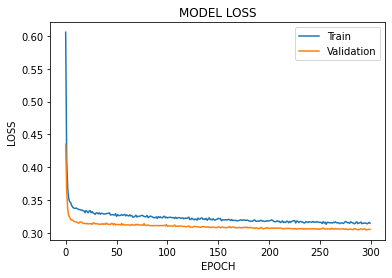

In [56]:
# Gráfica de LOSS

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('MODEL LOSS')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend()
plt.show()

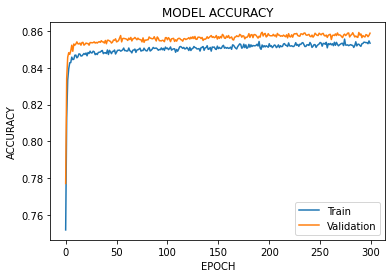

In [57]:
# Gráfica de ACCURACY

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('MODEL ACCURACY')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCH')
plt.legend()
plt.show()

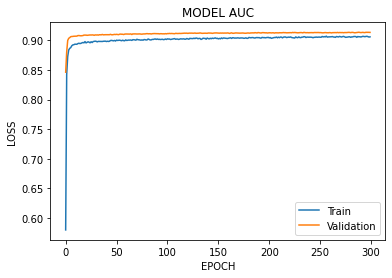

In [58]:
# Gráfica de AUC

plt.plot(history.history['auc'], label='Train')
plt.plot(history.history['val_auc'], label='Validation')
plt.title('MODEL AUC')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend()
plt.show()

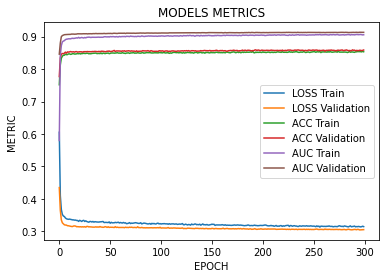

In [59]:
# Gráficas

plt.plot(history.history['loss'], label='LOSS Train')
plt.plot(history.history['val_loss'], label='LOSS Validation')
plt.plot(history.history['accuracy'], label='ACC Train')
plt.plot(history.history['val_accuracy'], label='ACC Validation')
plt.plot(history.history['auc'], label='AUC Train')
plt.plot(history.history['val_auc'], label='AUC Validation')
plt.title('MODELS METRICS')
plt.ylabel('METRIC')
plt.xlabel('EPOCH')
plt.legend()
plt.show()

In [63]:
# Función para generar métricas de evaluación del modelo: Accuracy, Precision, Recall, F1

def metrics(x, y, model, scores_table):
  y_pred = model.predict(x)

  for i in range(len(y_pred)):
    if y_pred[i] > 0.5:
      y_pred[i] = 1
    else:
      y_pred[i] = 0

  next_file = len(os.listdir('/content/drive/MyDrive/MLP/Models')) + 1

  accuracy = sk.metrics.accuracy_score(y_true = y, y_pred = y_pred)
  precision = sk.metrics.precision_score(y_true = y, y_pred = y_pred)
  recall = sk.metrics.recall_score(y_true = y, y_pred = y_pred)
  f1 = sk.metrics.f1_score(y_true = y, y_pred = y_pred)
  
  scores_table.loc[next_file] = [next_file, accuracy, precision, recall, f1]
  
  # Guardar el Modelo
  model.save('/content/drive/MyDrive/MLP/Models/model-' + str(next_file) + '.h5')

  return scores_table

In [64]:
scores_table = metrics(x_test, y_test, model, scores_table)
scores_table

,Model,Accuracy,Precision,Recall,F1
3,3.0,0.850343,0.776596,0.547957,0.642543


In [65]:
# Guardar los Scores de todos los modelos

#scores_table.to_csv('/content/drive/MyDrive/MLP/Models/Models_Scores.csv')

In [66]:
# Recrea el modelo deseado
#new_model = keras.models.load_model('Models/model-.h5')

### CONCLUSIONES

* Se realizó un análisis exploratorio inicial de todas las variables independientes para tener mejor visibilidad de los datos y saber como trabajarlos, se consideran todas las variables del dataset, se creó una Red MLP para analizar las variables independientes y poder crear una red neuronal capaz de aprender el comportamiento de dichas variables respecto a la que queremos predecir, posterior a ello se realizan las predicciones.

* Se puede observar que durante el proceso de entrenamiento se logra la estabilidad o convergencia bastante rápido, en las primeras 100 épocas ya se tiene un costo bastante bajo y una exactitud bastante alta. El resultado final es una exactitud del 85.34% con los datos de entrenamiento, 85.89% con los datos de validación y 85.03% con los datos de Test.

* Es importante realizar tratamiento de las variables antes de meterlas a nuestra red neuronal para entrenarla, por ejemplo tratar los datos N/A, o datos faltantes, realizar un escalado de la data, normalización, etc. para que la red neuronal tenga un mejor proceso de aprendizaje.